<html>
<h1 style="text-align:center; color:rgb(153, 99, 0)">EXPLORING PATTERNS AND TRENDS<br> IN EVERYDAY RECIPES</h1>
<h2 style="text-align:center; color:rgb(153, 99, 0)">SENG 474 – DATA MINING</h2>
<br>
<p style="text-align:center; font-size:14pt; font-style:italics">November 30, 2018</p>
<br>

<div style="height: auto; width: 230px; text-align:right">
<h5 style="text-align: left"><b>Prepared For:</b></h5>
Alex Thomo<br>
<h5 style="text-align: left"><b>By:</b></h5>
Abdulla Almahmood(V00857493)<br>
Max Gunton (V00511318)<br>
Yaxi Yu(V00828218)<br>
</div>
</html>

<span style="font-size:1.4em;text-decoration:underline;color:orange">**Introduction**</span>
<p>As long as there has been life on earth there has been food, and no other animal has quite mastered the art of combining and preparing food quite as much as humans.  </p>
<p>Scientists generally agree that our early ancestors, Homo erectus, first appeared in Africa 1–2 million years ago. They spread throughout the world and evolved into ancient humans, and approximately 250,000 years ago: hearths appeared.  This is by most accounts the accepted archeological estimate for invention of cooking.  </p>
<p>Knowing that cooking and development of recipes has been on going for 250,000 years we figured there must be hidden patterns yet to be discovered in the ingredients and the cooking techniques used.  </p>


<span style="color:orange; font-size:1.4em; text-decoration:underline">**1.0 Data Collection**</span>
<h4 style="color:orange">You are only as good as your data!  And our data was …. Ok.  </h4>
<p>Initially we had hoped to collect and process our own data, but we were all quite busy this semester.  Therefore, we decided that in order to get the most out of applying the algorithms and techniques we learned, we would simply use an already existing dataset.  </p>
<p>The dataset we chose to use was uploaded to Kaggle.com and can be found using the following link:</p>
	&nbsp;<a href="https://www.kaggle.com/hugodarwood/epirecipes#full_format_recipes.json">https://www.kaggle.com/hugodarwood/epirecipes#full_format_recipes.json</a>
<p>The data comes in the form of a 26.7 CSV file and is composed of 20052 rows and 680 columns.  Each row represents a recipe structured as follows:</p>
<p>title | rating | calories | protein	fat	sodium | … | "characteristics & ingredients" </p>

<p>Where the first 6 row provide information about each recipe and the following 674 rows contain a 0 or a 1 depending on whether they contain the corresponding ingredient or satisfy the characteristic.  </p>

<h3 style="color:orange">1.1 Pitfalls of Our Dataset</h3>

<h4 style="color:orange">Overly Simplified</h4>
<p>One of the major downsides of using this provided dataset is that you can’t force anything out of it that isn’t already there.  For example, the presence of an ingredient is a good start when it comes to classifying recipes, but it is only part of the equation.  And we would be foolish to believe that the ratios of ingredients (their normalized weights) don’t also play a major part in finding patterns.  If we were collecting the data ourselves, we would have liked to include the weights of the ingredients instead of simply a 1 or 0.  </p>


<h4 style="color:orange">Flavour Molecule</h4>
<p>Given more time, we would have also liked to have added information about the composition of the ingredients themselves.  More specifically, the composition of flavour molecules that make up each ingredient.  We believe that this is the direction that would result in the most interesting results.  Using these we could compute the Cosine similarity between ingredients which would allow us to offer recommendation for food pairings.  As well as discover which flavor molecules go well with others.  However, gathering the data and structuring it proved to be too time consuming for the scope of this project.  It would also have added a level of complexity that may have been more than we could handle as beginners to data mining.  </p>

<h3 style="color:orange">1.2 Benefits of Our Dataset</h3>
<p>Some of the positive things about the dataset we are using is that it contains many attributes/columns, and this means that there are many potential relationships to be discovered.  In addition, the data came ready to go for frequent item set analysis, which allowed us to focus on implementing and optimizing the algorithm, rather than playing around with the data.  </p>
<p>Our dataset is also large, and this meant that we had to keep in mind efficiency as well as implement things in such a way that they could be generalized.  It also gave us a taste of how things go in industry, when you can’t see all your data at once.  This really drove the importance of using the visualization tools in the matplotlib library.  And although we were able to load our entire dataset into excel, it was on the upper limit of what excel could handle.  This meant that any data preprocessing had to be done using Python, and in a generalized way as it wasn’t feasible to do it by hand.  </p>


<span style="color:orange; font-size:1.4em; text-decoration:underline">**2.0 Data Preprocessing**</span>

The preprocessing process aims to clean and transform the raw data to an useful form. In
order to do that, we follow the next steps:  
2.1. Deal with missing values  
2.2. Data normalization  
2.3. Data visualization  
2.4. Training and Testing data set generation: To generate the files required for the
data mining process (i.e, ARFF files for the WEKA tool)  


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Structured Data/epi_r.csv', low_memory=False)

<span style="color:orange">**2.1. Deal With Missing Values.**</span>

In this section, we will look at how we can identify and mark values as missing.  
We can use plots and summary statistics to help identify missing or corrupt data.  
We can load the dataset as a Pandas DataFrame and print summary statistics on each attribute.

In [3]:
print(data.describe())

             rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

Now if we chain a .sum() method on the dataframe, we can see which column contain missing values:

In [4]:
data.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

Let's list all the column names which contain missing values

In [5]:
data.columns[data.isnull().any()].tolist()

['calories', 'protein', 'fat', 'sodium']

The simplest strategy for handling missing data is to remove records that contain a missing value.  
We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.  
Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:  

In [6]:
data.dropna(inplace=True)

Check again to see if we still have missing values:

In [7]:
data.columns[data.isnull().any()].tolist()

[]

All set!

<span style="color:orange">**2.2. Data normalization.**</span>

In [8]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


as we can see, the 1st column stores the name of each recipe;  
the column 2 to 6 store the generational info of each recipe;  
and the rest store the ingredients respectively (the value of these columns are eigher 0 or 1, showing whether each ingredient exist in this recipe or not).   

We want to normalize the data in the 2nd to the 6th columns.

In [9]:
data_general_info = data[['rating', 'calories', 'protein', 'fat', 'sodium']]
data_general_info.head()

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,7.0,559.0
1,4.375,403.0,18.0,23.0,1439.0
2,3.750,165.0,6.0,7.0,165.0
4,3.125,547.0,20.0,32.0,452.0
5,4.375,948.0,19.0,79.0,1042.0


Construct a method to normalize the data

In [10]:
def normalize(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

Call this method to normalze these columns

In [11]:
data_general_info_normalized = data_general_info.apply(normalize)
data_general_info_normalized.head()

,rating,calories,protein,fat,sodium
0,0.500,0.000014,0.000127,0.000004,0.000020
1,0.875,0.000013,0.000076,0.000013,0.000052
2,0.750,0.000005,0.000025,0.000004,0.000006
4,0.625,0.000018,0.000085,0.000019,0.000016
5,0.875,0.000031,0.000080,0.000046,0.000038


<span style="color:orange">**2.3. Data Visualization.**</span>

We can use seaborn (a Python data visualization library based on matplotlib) to visualize the data.

In [12]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Let us explore the Rating first

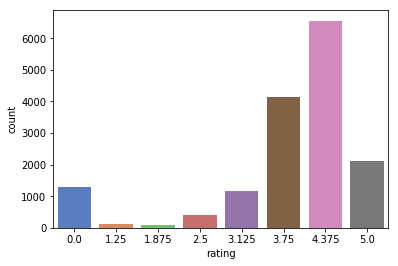

In [13]:
sns.countplot(x="rating", data = data, palette="muted")
plt.show()

**Split Series Data by rating**  
As we can see from the previous information:
the mean of rating: 3.7  
the max of rating: 5  
the min of rating: 0  

So we assume that:
rating >= 3.7 - popular recipies  
rating <3.7 - unwelcome recipies

How many popular recipies?

In [21]:
data['Rating_Popular_or_Unwelcome'] = np.where(data['rating']<3.7, 0, 1) # 0 = unwelcome &&  1 = popular
data.Rating_Popular_or_Unwelcome.value_counts()

1    12794
0     3070
Name: Rating_Popular_or_Unwelcome, dtype: int64

In [15]:

# pos_calories = data[data['rating'] >= 3.7]['calories']
# neg_calories = data[data['rating'] < 3.7]['calories']
# # print(pos_calories)
# pos_fat = data[data['rating'] >= 3.7]['fat']
# neg_fat = data[data['rating'] < 3.7]['fat']
# pos_protein = data[data['rating'] >= 3.7]['protein']
# neg_protein = data[data['rating'] < 3.7]['protein']

In [16]:
# fig = plt.figure(figsize=(12, 6))
# plt.title("Calories -> Popular/Unwelcome Distribution")
# pos_protein.hist(alpha=0.5, bins=20, label='Popular')   
# # axs[0].hist(x, bins=n_bins)
# # axs[1].hist(y, bins=n_bins)
# neg_protein.hist(alpha=0.5, bins=20, label='Unwelcome')
# plt.legend(loc="upper right")


The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

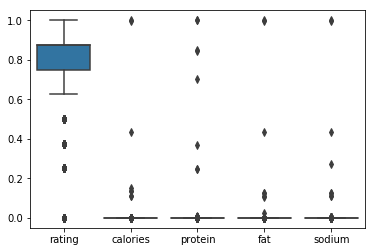

In [17]:
sns.boxplot(data = data_general_info_normalized)
plt.show()

A violin plot is similar to a box plot with a rotated kernel density plot on each side.  
Use Violin Plot to visualise the distribution of the data and its probability density.

C:\Users\OVRS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


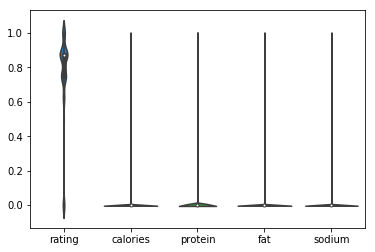

In [18]:
sns.violinplot(data=data_general_info_normalized)

plt.show()

<span style="color:orange;">**2.4 Training and Testing data set generation**</span>  
We decided to implement the training / testing split using K-Fold cross validation.  

<span style="color:orange; font-size:1.4em; text-decoration:underline">**3. Data Mining**</span>

Data mining is the process of discovering patterns in large data sets involving methods at the intersection of machine learning, statistics, and database systems. This project is aiming to find interesting patterns and relationships between vairous attributes and do predictions on the ratings of each recipe. 

To achieve this, we first tried to use WEKA to classify the attributes using various machine learning classifiers. However, we had a hart time importing our large csv file to Weka.

We first tried to import the csv file directly to WEKA:

<img src="img/weka1.png" style="height:250px"> 

However, an error occured saying "attribute names are not unique!"

<img src="img/weka2.png" style="height:100px"> 

Since we have 680 columns in total, finding the duplicates and rename them would be time consuming. Therefore, we tried to simply remove the titles, and add a range of numbers to place them:

<img src="img/weka3.png" style="height:200px"> 

unfortunately, a different error occured when we tried to import this file again, saying "680 Problem encountered on line: 23":

<img src="img/weka4.png" style="height:100px"> 

While trying to find the resolvent online, we found that there's a number of programmers having problems loading large size csv to WEKA. Either the file itself is not accepted, or the loading and processing process take too much of their time.  
Therefore, we come into aggreement to code the classifers ourselves. 

**Below is a class of confidence interval**  
It takes in the predictions as an array and the correct classifications and uses the two to return the confidence interval  
We can initialize the confidence interval object and call its method later to calculate and display prediction

In [19]:
# confidenceInterval.py

# TODO: expand evaluator to handle continuous class labels

# class_labels must be discrete and not continuous and numerical

class confidenceInterval:
    CLT_PROB_DIST = {0.1 : 3.09,    # 99.8% confidence
                 0.5 : 2.58,     # 99%     "
                 1.0 : 2.33,    # 98%      "
                 5.0 : 1.65,    # 90%      "
                 10.0 : 1.28,   # 80%      "
                 20.0 : 0.84,   # 60%      "
                 40.0 : 0.25}   # 20%      "
    MAX_SPREAD = 100
    p = None
    q = None
    variance = None
    SN = None
    N = None
    confidence = None
    
    
    def __init__(self, predictions=None, class_labels=None):
        pass

    def quantizeConfidence(self, confidence):
        index = (100 - confidence)/2.0
        values = np.array([0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 40.0])
        diffs = abs(values - index)
        index = values[np.argmin(diffs)]
        return (100 - (2*index)) , index

    
    def establish(self, predictions, class_labels, confidence=90):
        
        assert (len(predictions) == len(class_labels))

        self.confidence, index = self.quantizeConfidence(confidence)
        self.N = len(predictions)

        # ensure that the input arrays are of type numpy.array
        predictions = np.array(predictions)     # predictions.shape = (N,)
        class_labels = np.array(class_labels)   # class_labels.shape = (N,)

        # check to make sure they are the same shape
        assert (predictions.shape == class_labels.shape)

        # compare each array element wise to see if they are the same
        # given multiple class values if they are represented using integers
        # the predictions can be subtracted from the actual class_labels and
        # resulting zeros will indicate a successful predictions; anything else will
        # indicate an error or incorrect prediction

        results = class_labels - predictions
        #print(results)  # prints correctly
        #print(self.N)  # prints 32
        
        self.p = float(len([result for result in results if result == 0]))/float(self.N)
        self.q = 1-self.p
        self.variance = self.p*self.q/self.N
        denom = np.sqrt(self.variance)

        self.SN = [(self.p - self.CLT_PROB_DIST[index]*denom),
                   (self.p + self.CLT_PROB_DIST[index]*denom)]

        return
        
   
    def printConfidence(self):
        if self.SN != None:
            # \U+03F5 unicode for within the set
            print('Successes: {}\nErrors: {}\n___________\nTotal Instances: {}\n\nP: {}\nQ: {}\nVariance:'
                  ' {}\n'.format(self.p*self.N, self.q*self.N, self.N, self.p, self.q, self.variance))
            print('With {}% confidence probability of correct classification is in the '
                  'range {:.1f}% - {:.1f}%\n\n'.format(self.confidence,self.SN[0]*100,
                                                   self.SN[1]*100))
        else:
            print('Confidence not yet established\n\n')
        return

**Below is a class of ROC curve**  
We can initialize the ROC curve object and call its method later to generate the ROC curve of mutiple classifiers we have  
**NOTE: **

In [123]:
# ROC_curve.py
# the following code is adapted from
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

def displayROC(classifier_t, y, X, name, seed, n_classes):

    y = label_binarize(y, classes=[i for i in range(n_classes)])
    
    if n_classes == 2:
        n_classes = 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                        random_state=seed)
    all_y_scores = []
    classifier = OneVsRestClassifier(classifier_t)
    try:
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    except AttributeError:
        return
    # y_score = log_reg_m.decision_function(X_test)
    # print(y_score[:, 0])
    # print(y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_score = y_score.reshape(y_test.shape)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    from scipy import interp
    from itertools import cycle
    
    # Compute macro-average ROC curve and ROC area
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'pink', 'blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve '+name)
    plt.legend(loc="lower right")
    plt.show()

**Below is an implementation of a cross validator**  

In [ ]:
# crossValidator.py

import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Linear Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn import svm

# Decision Tree Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc

Our current implementation attempts to classify the rating attribute, but other this can be modified to any 

In [128]:
# Most attributes are binary ie/ NUM_CLASSES = 2, but the first 6 columns are continous and thus can be divided into 
# however many discrete classes as the user sees fit

CLASS_LABEL = 'rating'
NUM_CLASSES = 6
NUM_SPLITS = 2

In [129]:
df = data

# if trying to predict any of the first few column, best to run the following line as the majority of the recipes
# have calories < 1000, and the few that are greater throw things out of wack
df = df[df.calories < 1000]  # probably not a bad idea to do this anyway
# df = df[df.sodium < 1000]


# split data into attributes and class labels
y = df[CLASS_LABEL]
X = df[[col for col in df.columns if col != CLASS_LABEL]]

X = X.drop(['title','Rating_Popular_or_Unwelcome'],axis=1)  # if Classify rating should drop the Rating_Popular... 
                                                            # because it gives the classifiers an unfair advantage
                                                            # as it is derived from rating and vice versa
#X = X[:,:3]
#print(X.head())

# convert y to a numpy array
y = np.array(y)
y.reshape((-1,))

# change y from being continuous values between 0-5 to simply being an integer number
# 0, 1, 2, 3, 4, or 5
#maximum = y.max()
#minimum = y.min()
#diff = maximum - minimum
#print(maximum)
#print(diff)
#step = diff/NUM_CLASSES
#y = np.around(y/step)
y = pd.cut(y,NUM_CLASSES, right=False, labels=[i for i in range(NUM_CLASSES)])
print(y)

strat_k_fold = StratifiedKFold(n_splits=NUM_SPLITS)  # parameters n_folds=10, shuffle=False, random_state=None

# Here we want to cast X and y as numpy arrays
X = np.array(X)
y = np.array(y)

# want to find the class that occurs the least often and only take that many instances
# from each class value so that we end up with an even distribution
minimum = np.min([len([val for val in y if val == i]) for i in range(NUM_CLASSES)])
print([len([val for val in y if val == i]) for i in range(NUM_CLASSES)])

classes = np.array([],dtype=np.int32).reshape(-1,)
for i in range(NUM_CLASSES):
    classes = np.append(classes,np.array((np.where(y == i)),dtype=np.int32).reshape(-1,)[:minimum])

X = X[classes] # extract our subset from entire dataset
y = y[classes] #              "

#X = X[:, :3]  # remove the title column from the dataset since these are unique to each entry anyway

X = np.ascontiguousarray(X, dtype=np.float32)  # for better efficiency when implementing some of the classifiers
y = np.ascontiguousarray(y, dtype=np.float32)  #                       "

scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X = scaler.fit_transform(X)  # Normalize attributes for faster convergence

splits = strat_k_fold.split(X, y)
# scores = np.array([], dtype=np.float32).reshape(-1,)

[3, 5, 4, 3, 5, ..., 3, 5, 5, 5, 5]
Length: 14460
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]
[1228, 114, 79, 1470, 3782, 7787]


Then we can train and test our data on 5 classifiers: 

1. Logistic Regression
2. Naive Bayes
3. Decision Tree
4. Perception
5. KNN Classifier
6. MLP classifier

And print out the results of each classifier of each fold


FOLD -  1 of 2

Logistic Regression Prediction

Successes: 71.0
Errors: 169.0
___________
Total Instances: 240

P: 0.29583333333333334
Q: 0.7041666666666666
Variance: 0.0008679832175925925

With 80.0% confidence probability of correct classification is in the range 25.8% - 33.4%




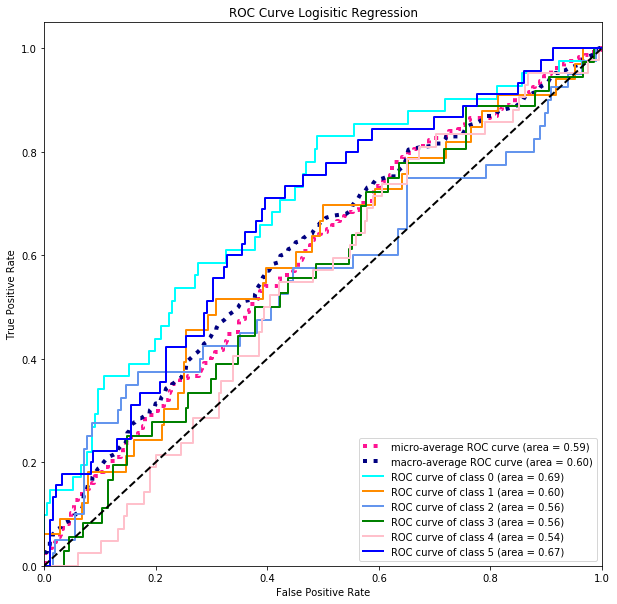

Naive Bayes

Successes: 49.0
Errors: 191.0
___________
Total Instances: 240

P: 0.20416666666666666
Q: 0.7958333333333334
Variance: 0.0006770109953703704

With 80.0% confidence probability of correct classification is in the range 17.1% - 23.7%


Decision Tree

Successes: 58.0
Errors: 182.0
___________
Total Instances: 240

P: 0.24166666666666667
Q: 0.7583333333333333
Variance: 0.000763599537037037

With 80.0% confidence probability of correct classification is in the range 20.6% - 27.7%


Perception

Successes: 64.0
Errors: 176.0
___________
Total Instances: 240

P: 0.26666666666666666
Q: 0.7333333333333334
Variance: 0.0008148148148148149

With 80.0% confidence probability of correct classification is in the range 23.0% - 30.3%




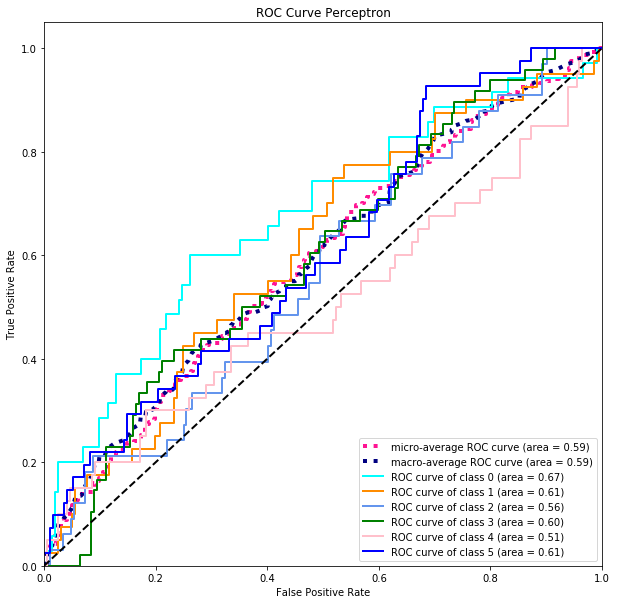

Nearest Neighbour (KNN)

Successes: 64.0
Errors: 176.0
___________
Total Instances: 240

P: 0.26666666666666666
Q: 0.7333333333333334
Variance: 0.0008148148148148149

With 80.0% confidence probability of correct classification is in the range 23.0% - 30.3%


Neural Networks (MLP)
Successes: 65.0
Errors: 175.00000000000003
___________
Total Instances: 240

P: 0.2708333333333333
Q: 0.7291666666666667
Variance: 0.0008228443287037038

With 80.0% confidence probability of correct classification is in the range 23.4% - 30.8%


Support Vector Machine 1

Successes: 58.0
Errors: 182.0
___________
Total Instances: 240

P: 0.24166666666666667
Q: 0.7583333333333333
Variance: 0.000763599537037037

With 80.0% confidence probability of correct classification is in the range 20.6% - 27.7%




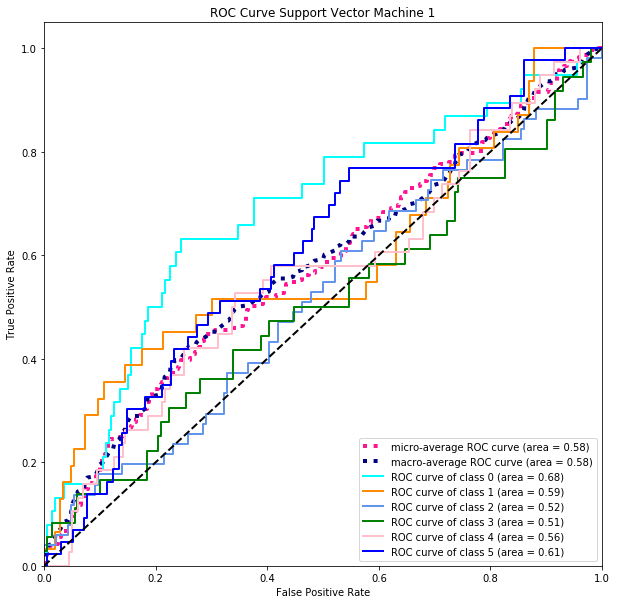

Support Vector Machine 2

Successes: 43.0
Errors: 197.0
___________
Total Instances: 240

P: 0.17916666666666667
Q: 0.8208333333333333
Variance: 0.0006127748842592593

With 80.0% confidence probability of correct classification is in the range 14.7% - 21.1%




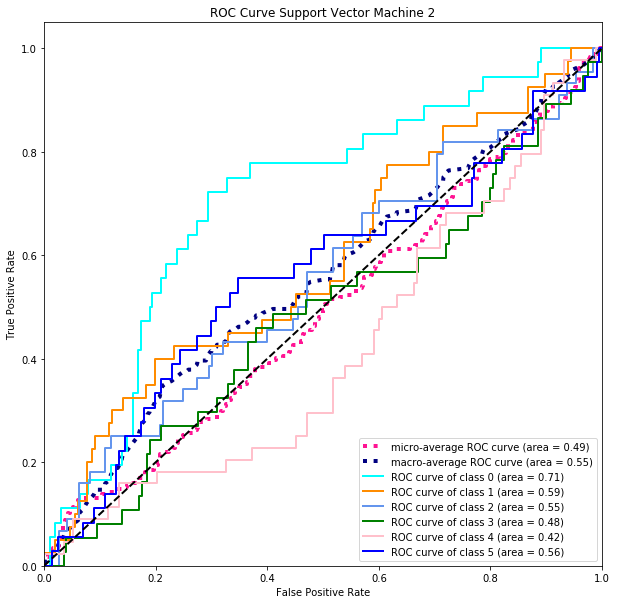

Support Vector Machine 3

Successes: 66.0
Errors: 174.0
___________
Total Instances: 240

P: 0.275
Q: 0.725
Variance: 0.0008307291666666667

With 80.0% confidence probability of correct classification is in the range 23.8% - 31.2%




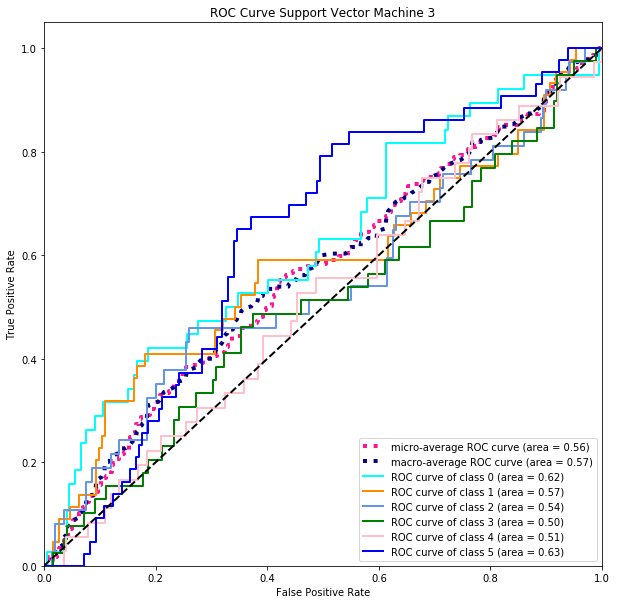

Random

Successes: 38.0
Errors: 202.0
___________
Total Instances: 240

P: 0.15833333333333333
Q: 0.8416666666666667
Variance: 0.0005552662037037037

With 80.0% confidence probability of correct classification is in the range 12.8% - 18.8%


Combined Using Voting

Successes: 72.0
Errors: 168.0
___________
Total Instances: 240

P: 0.3
Q: 0.7
Variance: 0.000875

With 80.0% confidence probability of correct classification is in the range 26.2% - 33.8%



FOLD -  2 of 2

Logistic Regression Prediction

Successes: 68.0
Errors: 165.99999999999997
___________
Total Instances: 234

P: 0.2905982905982906
Q: 0.7094017094017093
Variance: 0.0008809868551266754

With 80.0% confidence probability of correct classification is in the range 25.3% - 32.9%




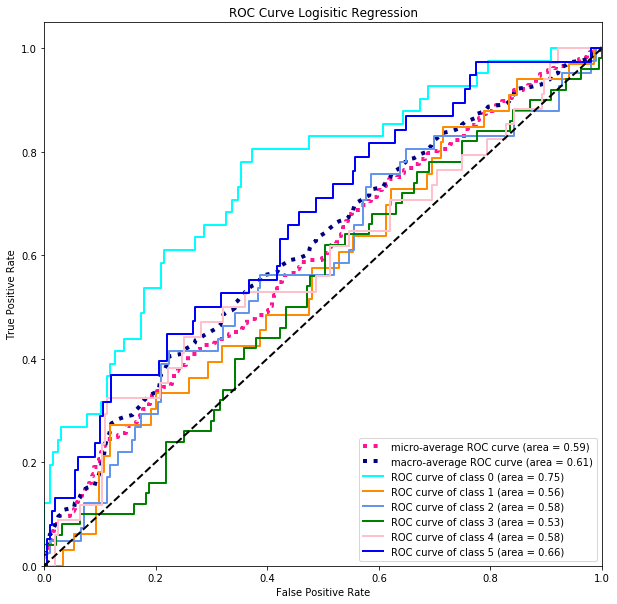

Naive Bayes

Successes: 67.0
Errors: 167.0
___________
Total Instances: 234

P: 0.2863247863247863
Q: 0.7136752136752137
Variance: 0.0008732602694908195

With 80.0% confidence probability of correct classification is in the range 24.8% - 32.4%


Decision Tree

Successes: 52.0
Errors: 182.0
___________
Total Instances: 234

P: 0.2222222222222222
Q: 0.7777777777777778
Variance: 0.0007386303682599979

With 80.0% confidence probability of correct classification is in the range 18.7% - 25.7%


Perception

Successes: 61.00000000000001
Errors: 173.0
___________
Total Instances: 234

P: 0.2606837606837607
Q: 0.7393162393162394
Variance: 0.0008236228102544124

With 80.0% confidence probability of correct classification is in the range 22.4% - 29.7%




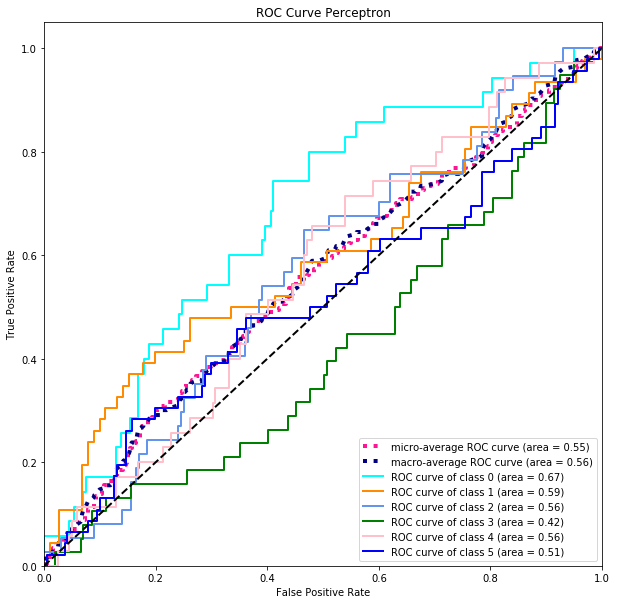

Nearest Neighbour (KNN)

Successes: 61.00000000000001
Errors: 173.0
___________
Total Instances: 234

P: 0.2606837606837607
Q: 0.7393162393162394
Variance: 0.0008236228102544124

With 80.0% confidence probability of correct classification is in the range 22.4% - 29.7%


Neural Networks (MLP)
Successes: 74.0
Errors: 160.0
___________
Total Instances: 234

P: 0.3162393162393162
Q: 0.6837606837606838
Variance: 0.0009240684235205383

With 80.0% confidence probability of correct classification is in the range 27.7% - 35.5%


Support Vector Machine 1

Successes: 69.0
Errors: 164.99999999999997
___________
Total Instances: 234

P: 0.2948717948717949
Q: 0.7051282051282051
Variance: 0.0008885573481234231

With 80.0% confidence probability of correct classification is in the range 25.7% - 33.3%




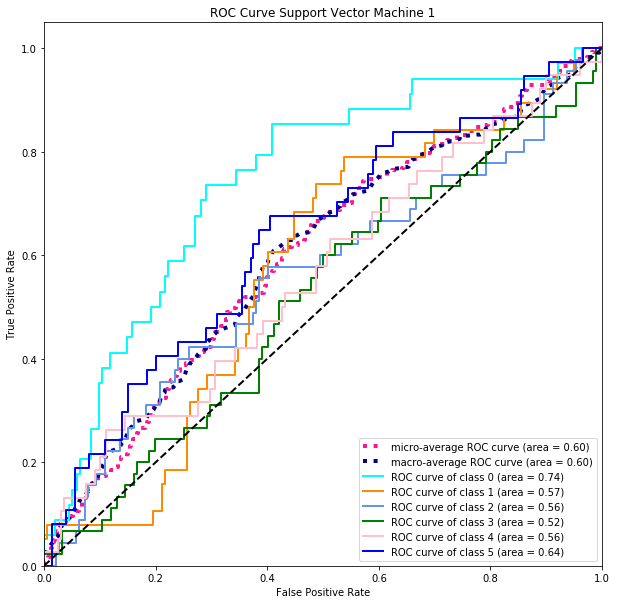

Support Vector Machine 2

Successes: 46.0
Errors: 188.0
___________
Total Instances: 234

P: 0.19658119658119658
Q: 0.8034188034188035
Variance: 0.0006749445715038526

With 80.0% confidence probability of correct classification is in the range 16.3% - 23.0%




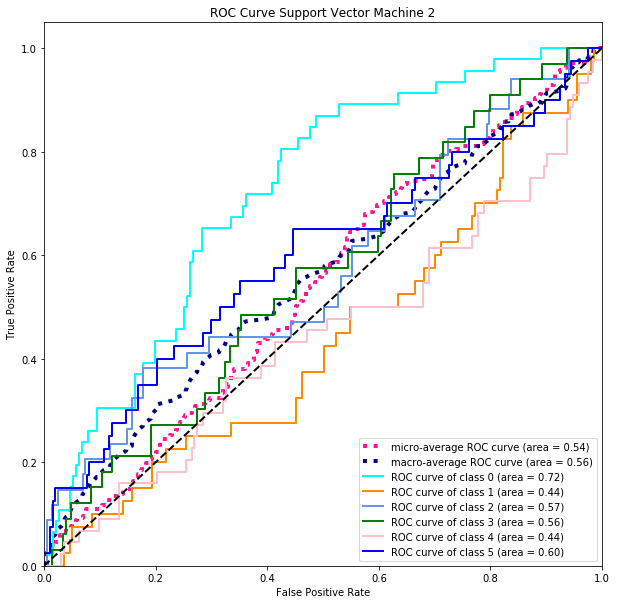

Support Vector Machine 3

Successes: 65.0
Errors: 169.0
___________
Total Instances: 234

P: 0.2777777777777778
Q: 0.7222222222222222
Variance: 0.0008573388203017832

With 80.0% confidence probability of correct classification is in the range 24.0% - 31.5%




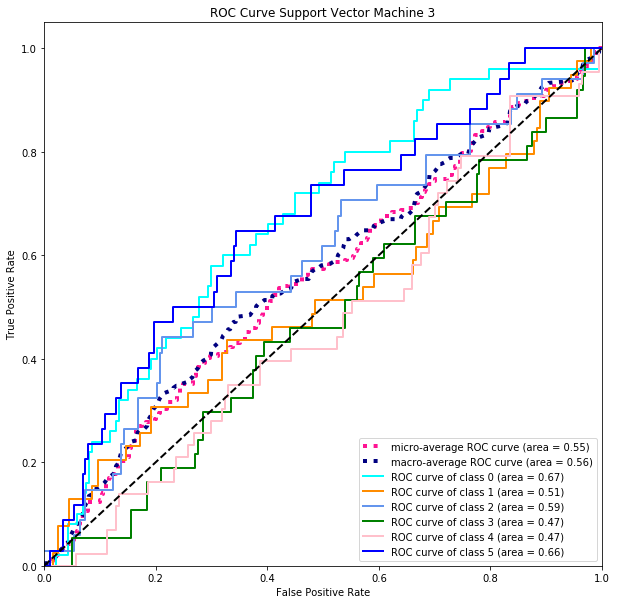

Random

Successes: 37.0
Errors: 197.0
___________
Total Instances: 234

P: 0.1581196581196581
Q: 0.8418803418803419
Variance: 0.0005688796232298313

With 80.0% confidence probability of correct classification is in the range 12.8% - 18.9%


Combined Using Voting

Successes: 70.0
Errors: 164.0
___________
Total Instances: 234

P: 0.29914529914529914
Q: 0.7008547008547008
Variance: 0.0008959717484810625

With 80.0% confidence probability of correct classification is in the range 26.1% - 33.7%




In [130]:
count = 1

for train_index, test_index in splits:
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


    # print('Train Index: {}'.format(train_index))
    # print('Test Index: {}'.format(test_index))

    #print(y_train)

    # TODO: use a grid search to determine the best learning constant
    #       tweek C and max iterations to get good convergence and speed mix
    log_reg_m = LogisticRegression(solver='lbfgs', C=0.1, max_iter=5000, multi_class='multinomial') #max_iter=50000
    nb = GaussianNB()
    tree = DecisionTreeClassifier()
    percep = Perceptron(tol=0.0001, max_iter=5000)
    svc_m = svm.SVC(gamma=0.00147059)  # gamma = 1/num_attributes
    svc_m2 = svm.SVC(gamma=0.00147059, kernel='poly')  # gamma = 1/num_attributes
    svc_m3 = svm.SVC(gamma=0.00147059, kernel='linear')  # gamma = 1/num_attributes
    
    
    

    log_reg_m.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    percep.fit(X_train, y_train)
    svc_m.fit(X_train, y_train)
    svc_m2.fit(X_train, y_train)
    svc_m3.fit(X_train, y_train)

    y1 = log_reg_m.predict(X_test) 
    y2 = nb.predict(X_test)
    y3 = tree.predict(X_test)
    y4 = percep.predict(X_test)
    y5 = svc_m.predict(X_test)
    y6 = svc_m2.predict(X_test)
    y7 = svc_m3.predict(X_test)
    
    #print(y1)
    #print(y2)
    #print(y3)
    #print(y4)
    #print(y5)
    #print(y6)
    #print(y7)
    
    y_avg = np.around((y1+y2+y3+y4+y5+y6+y7) // 7)
    
    y_all = []
    #print(y_avg)
    
    for i in range(len(y_test)):
        counts = {}
        counts[y1[i]] = counts.get(y1[i],0) + 1
        counts[y2[i]] = counts.get(y2[i],0) + 1
        counts[y3[i]] = counts.get(y3[i],0) + 1
        counts[y4[i]] = counts.get(y4[i],0) + 1
        counts[y5[i]] = counts.get(y5[i],0) + 1
        counts[y6[i]] = counts.get(y6[i],0) + 1
        counts[y7[i]] = counts.get(y7[i],0) + 1
        counts[y_avg[i]] = counts.get(y_avg[i],0) + 1
        winner = None
        for j in counts:
            if winner == None:
                winner = j
            elif counts[j] > counts.get(winner,0):
                winner = j
            else:
                pass
        y_all.append(winner)
    
    y_all = np.array(y_all).reshape((-1,))
    
    #------------------------------logistic regression-----------------------------
    prediction = y1
    c1 = confidenceInterval()
    c1.establish(prediction, y_test, 80) # want to know with 80% confidence
    print('\nFOLD -  {} of {}\n'.format(count, NUM_SPLITS))
    print("Logistic Regression Prediction\n")
    c1.printConfidence()
    log_reg_m = LogisticRegression(solver='lbfgs', C=0.1, max_iter=5000, multi_class='multinomial') #max_iter=50000
    displayROC(log_reg_m, y, X, 'Logisitic Regression', np.random.randint(0,1000), NUM_CLASSES)
    
    
    #----------------------------------naive bayes----------------------------------
    prediction = y2
    c2 = confidenceInterval()
    c2.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Naive Bayes\n")
    c2.printConfidence()
    nb = GaussianNB()
    displayROC(nb, y, X, 'Naive Bayes', np.random.randint(0,1000), NUM_CLASSES)
    
    #---------------------------------decision tree---------------------------------
    prediction = y3
    c3 = confidenceInterval()
    c3.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Decision Tree\n")
    c3.printConfidence()
    tree = DecisionTreeClassifier()
    displayROC(tree, y, X, 'Decision Tree', np.random.randint(0,1000), NUM_CLASSES)
    
    
    
    #----------------------------------perception-----------------------------------
    prediction = y4
    c4 = confidenceInterval()
    c4.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Perception\n")
    c4.printConfidence()
    percep = Perceptron(tol=0.0001, max_iter=5000)
    displayROC(percep, y, X, 'Perceptron', np.random.randint(0,1000), NUM_CLASSES)
    
    
    
    #----------------------------------KNN-----------------------------------
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train) 
    predicition = classifier.predict(X_test) 
    #print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    c5 = confidenceInterval()
    c5.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Nearest Neighbour (KNN)\n")
    c5.printConfidence()
    classifier = KNeighborsClassifier(n_neighbors=5)
    displayROC(mlp, y, X, 'Nearest Neighbour (KNN)', np.random.randint(0,1000), NUM_CLASSES)
    
    
    #----------------------------------MLP-----------------------------------
    mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
    mlp.fit(X_train,y_train)
    MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
    prediction = mlp.predict(X_test)
    c6 = confidenceInterval()
    c6.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Neural Networks (MLP)")
    c6.printConfidence()
    mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
    displayROC(mlp, y, X, 'Neural Networks (MLP)', np.random.randint(0,1000), NUM_CLASSES)
    
        #----------------------------------support vector machine-----------------------
    prediction = y5
    c7 = confidenceInterval()
    c7.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Support Vector Machine 1\n")
    c7.printConfidence()
    svc_m = svm.SVC(gamma=0.00147059)  # gamma = 1/num_attributes
    displayROC(svc_m, y, X, 'Support Vector Machine 1', np.random.randint(0,1000), NUM_CLASSES)
    
    
    prediction = y6
    c8 = confidenceInterval()
    c8.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Support Vector Machine 2\n")
    c8.printConfidence()
    svc_m2 = svm.SVC(gamma=0.00147059, kernel='poly')  # gamma = 1/num_attributes
    displayROC(svc_m2, y, X, 'Support Vector Machine 2', np.random.randint(0,1000), NUM_CLASSES)
    
    prediction = y7
    c9 = confidenceInterval()
    c9.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Support Vector Machine 3\n")
    c9.printConfidence()
    svc_m3 = svm.SVC(gamma=0.00147059, kernel='linear')  # gamma = 1/num_attributes
    displayROC(svc_m3, y, X, 'Support Vector Machine 3', np.random.randint(0,1000), NUM_CLASSES)
    
    #----------------------------------random----------------------------------
    
    prediction = np.around(np.random.rand(y_test.shape[0])*(NUM_CLASSES-1))
    c10 = confidenceInterval()
    c10.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Random\n")
    c10.printConfidence()
    
    #-----------------------------------highest frequency----------------------
    
    prediction = y_all
    #print(y8)
    c12 = confidenceInterval()
    c12.establish(prediction, y_test, 80) # want to know with 80% confidence
    print("Combined Using Voting\n")
    c12.printConfidence()

    count += 1

Regarding to the result listed above, we can try to average them for each classifier and compare.

In [131]:
import itertools

class FrequentItemSet:

    SUPPORT = 100  # should maybe call this MIN_SUPPORT
    DB = None
    CONFIDENCE = 0.1
    INTEREST = 1


    def __init__(self, db, support, confidence):
        self.DB = db
        self.SUPPORT = support
        self.CONFIDENCE = confidence

    def checkAxis(self,array):
        for i in array:
            if i == 0:
                return 0
        return 1

    def createPotentialSets(self, k, fis):
        new_fis = []
        #k = 3  # for testing
        if k == 1:
            potential_fis = [[i] for i in sorted(list(self.DB))]
        else:
            potential_fis = []
            previous_sets = fis[-1]  # assuming we have run this previously already for frequent itemsets of size k-1
            #print(previous_sets)
            #print(len(previous_sets))
            #previous_sets = [['A','B'],['A','C'],['C','D']]
            #print(previous_sets)
            for i in range(len(previous_sets)):
                for j in previous_sets[(i+1):]:
                    #print('{} - {}'.format(previous_sets[i], j))
                    if previous_sets[i][:-1] == j[:-1]:
                        # now we have a potential set but we need to check if any of its subsets are infrequent
                        set_in_question = previous_sets[i]+[j[-1]]
                        subsets = itertools.combinations(set_in_question,k-1)
                        add = True
                        for m in subsets:
                            if list(m) not in previous_sets:
                                add = False
                                break
                        if add:
                            potential_fis.append(set_in_question)

        # print(potential_fis)
        # need to validate the potential FIS by counting their support in the database

        #potential_fis = [['fall']]
        #print(potential_fis)
        print('\nK = {}'.format(k))
        print('Pruning Step:   Start - {} potential sets'.format(len(potential_fis)))

        # this is the pruning step to make sure that all itemsets are indeed frequent
        for i in potential_fis:
            # print(i)  # prints the potential frequent item set
            item_set = self.DB[i]
            length = len(i)
            #print(length)
            temp = np.sum(item_set, axis=1)
            #new = np.array(temp).reshape(-1,)
            support = np.array(np.where(temp == length)).size

            # Below works but is really slow
            # support = np.sum(np.apply_along_axis(self.checkAxis, 1, item_set))
            if support >= self.SUPPORT:
                new_fis.append(i)
            #print(support)
            #break
        print('Pruning Step:   Complete - {} sets remaining'.format(len(new_fis)))
        #print(new_fis)
        return new_fis

        #

    def generateFIS(self):
        k = 2
        fis = []
        current_fis = self.createPotentialSets(1, fis)
        fis.append(current_fis)
        #print('k: 1  length: {}'.format(len(current_fis)))
        while len(current_fis) > 0:
            current_fis = []
            current_fis = self.createPotentialSets(k, fis)
            k += 1
            if len(current_fis) > 0:
                fis.append(current_fis)
            #break # remove after development
            #print('k: {}  length: {}'.format(k, len(current_fis)))

        return fis

    def generateClosedSets(self, all_sets):
        closed = {}
        all_sets.reverse()
        for i in range(len(all_sets)):
            for j in all_sets[i]:
                add = True
                if i == 0:
                    item_set = self.DB[j]
                    length = len(j)
                    # print(length)
                    temp = np.sum(item_set, axis=1)
                    # new = np.array(temp).reshape(-1,)
                    support = np.array(np.where(temp == length)).size
                    closed[frozenset(j)] = support
                else:
                    item_set = self.DB[j]
                    length = len(j)
                    # print(length)
                    temp = np.sum(item_set, axis=1)
                    # new = np.array(temp).reshape(-1,)
                    support = np.array(np.where(temp == length)).size
                    for k in closed:
                        if set(j).issubset(k):
                            support2 = closed[k]
                            if support2 >= support:
                                add = False
                                break
                    if add:
                        closed[frozenset(j)] = support
        return closed

    def deriveInterest(self, fis):
        rules = []
        rules2 = []
        rules3 = []
        all_length = len(self.DB[:])
        for i in fis:
            entry = list(i)
            temp = entry.copy()
            for j in entry:
                prob_y = np.sum(self.DB[j]) / all_length
                prob_entry = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
                temp.remove(j)
                prob_x = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
                confidence = prob_entry / prob_x
                # print(confidence)
                if (prob_y < confidence) and (confidence >= self.CONFIDENCE):  # filters all of the trivial rules
                    interest = prob_entry/(prob_x * prob_y)
                    if interest > 1:
                        rules.append('{} --> {} : interest={:05.3f}     confidence={:05.4f}'.format(temp, [j],
                                                                                             interest, confidence))
                        rules2.append([temp,[j]])
                        
        # The following works, but is inefficient and takes too long to finish when minimum support is low
        # this loop merges appropriate rules to create longer ones
        # for i in range(len(rules2)):
        #     for j in rules2[i:]:
        #         if len(set(j[1]) & set(rules2[i][1])) != len(j[1]):
        #             entry = list(set(rules2[i][0] + j[0] + rules2[i][1] + j[1]))
        #             temp = entry.copy()
        #             prob_entry = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
        #             temp.remove(j[1][0])
        #             temp.remove(rules2[i][1][0])
        #             if len(temp) != 0:
        #                 y = list(set(rules2[i][1] + j[1]))
        #                 prob_x = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
        #                 prob_y = np.array(np.where(np.sum(self.DB[y], axis=1) == len(y))).size / all_length
        #                 confidence = prob_entry / prob_x
        #                 #print(confidence)
        #                 #print(prob_y)
        #                 if (prob_y <= confidence) and (
        #                         confidence >= self.CONFIDENCE):  # filters all of the trivial rules
        #                     try:
        #                         interest = prob_entry / (prob_x * prob_y)
        #                     except ZeroDivisionError:
        #                         interest = 0
        #                     #print(interest)
        #                     if interest > 1:  # change back to 1
        #                         rules.append('{} --> {} : interest={:05.3f}     confidence={:05.4f}'.format(temp, y,
        #                                                                                                     interest,
        #                                                                                                     confidence))
        #                         rules3.append([temp, j])
        #     if i == (len(rules2) - 1):
        #         rules2 = rules3.copy()




        return rules



    def getSupport(self):
        return self.SUPPORT

    def getFIS(self):
        return self.FIS

def main():

    min_support = 20  # ran with value 10
    min_confidence = 0.2
    min_interest = 1.0
    df = pd.read_csv('Structured Data/epi_r.csv')  # read in data

    # PREPROCESSING STAGE ---------------------------------------------------------------

    df = df.drop(['title', 'rating', 'calories', 'protein', 'fat', 'sodium'], axis=1)

    # After running once decided to drop these as they seemed to lead to uninteresting results.
    # They alos had quite a high occurences which leads to explosions in complexity when looking for frequent item sets
    # with smaller support values.  Also many are generalization of much more specific information also included
    # therefore many times they lead to redundant information
    df = df.drop(
        ['bon appétit', 'kosher', 'peanut free', 'pescatarian', 'side', 'soy free', 'tree nut free', 'vegetarian',
         'wheat/gluten-free', 'no sugar added', 'dairy free', 'vegan', 'quick & easy', 'gourmet', 'bake',
         'kidney friendly', 'fruit', 'vegetable', 'dessert', 'alcoholic','backyard bbq', 'fourth of july', 'grill',
         'grill/barbecue', 'summer', 'healthy', 'dinner', 'appetizer', 'chill', 'christmas', 'cocktail party', 'drink',
         'fall', 'herb', 'high fiber', 'kid-friendly', 'lemon', 'low cal', 'lunch', 'no-cook', 'roast', 'salad',
         'sauce', 'sauté', 'soup/stew', 'spring', 'sugar conscious', 'thanksgiving', 'winter', 'brunch', 'breakfast',
         'berry', 'nut', 'bon app��tit'], axis=1)
    # df = df.drop(
    #     ['bon appétit', 'kosher', 'peanut free', 'pescatarian', 'side', 'soy free', 'tree nut free', 'vegetarian',
    #      'wheat/gluten-free', 'no sugar added', 'dairy free', 'vegan', 'quick & easy', 'gourmet', 'bake',
    #      'kidney friendly', 'fruit', 'vegetable', 'dessert', 'alcoholic','backyard bbq', 'fourth of july', 'grill',
    #      'grill/barbecue', 'summer', 'healthy', 'dinner', 'appetizer', 'chill', 'christmas', 'cocktail party', 'drink',
    #      'fall', 'herb', 'high fiber', 'kid-friendly', 'lemon', 'low cal', 'lunch', 'no-cook', 'roast', 'salad',
    #      'sauce', 'sauté', 'soup/stew', 'spring', 'sugar conscious', 'thanksgiving', 'winter', 'brunch', 'breakfast',
    #      'berry', 'nut'], axis=1)
    df = df.to_sparse(fill_value=0)
    fis = FrequentItemSet(df,min_support,min_confidence)
    #fis.generateFIS()
    print('FREQUENT ITEM SET ANALYSIS')
    print('Items: {}'.format(np.array(df[:]).shape[1]))
    print('Rows: {}'.format(np.array(df[:]).shape[0]))
    print('Min Support: {}'.format(min_support))
    print('Min Confidence: {}'.format(min_confidence))
    print('Min Interestingness: {}'.format(min_interest))
    all_item_sets = fis.generateFIS()
    count = np.sum(np.array([len(i) for i in all_item_sets]))
    print('\nGenerated {} Frequent Item Sets'.format(count))
    closed_item_sets = fis.generateClosedSets(all_item_sets)
    print('\nCLOSED ITEM SETS:')
    print('Number of sets: {}\n'.format(len(closed_item_sets)))
    for i in closed_item_sets:
        print('{}\t-\t{}'.format(list(i),closed_item_sets[i]))

    #want to derive interestingness from the data


    interesting_rules = fis.deriveInterest(closed_item_sets)
    print('\nRULES:')
    print('Number of rules: {}\n'.format(len(interesting_rules)))
    for i in interesting_rules:
        print(i)



main()

FREQUENT ITEM SET ANALYSIS
Items: 620
Rows: 20052
Min Support: 20
Min Confidence: 0.2
Min Interestingness: 1.0

K = 1
Pruning Step:   Start - 620 potential sets
Pruning Step:   Complete - 392 sets remaining

K = 2
Pruning Step:   Start - 76636 potential sets
Pruning Step:   Complete - 2654 sets remaining

K = 3
Pruning Step:   Start - 14546 potential sets
Pruning Step:   Complete - 432 sets remaining

K = 4
Pruning Step:   Start - 95 potential sets
Pruning Step:   Complete - 16 sets remaining

K = 5
Pruning Step:   Start - 2 potential sets
Pruning Step:   Complete - 1 sets remaining

K = 6
Pruning Step:   Start - 0 potential sets
Pruning Step:   Complete - 0 sets remaining

Generated 3495 Frequent Item Sets

CLOSED ITEM SETS:
Number of sets: 3493

['ice cream machine', 'milk/cream', 'freeze/chill', 'frozen dessert', 'egg']	-	20
['chocolate', 'cake', 'milk/cream', 'egg']	-	25
['chocolate', 'cake', 'mixer', 'food processor']	-	23
['chocolate', 'cake', 'mixer', 'milk/cream']	-	25
['cake',

['party', 'food processor']	-	58
['passover', 'food processor']	-	22
['pasta', 'food processor']	-	25
['pear', 'food processor']	-	22
['pecan', 'food processor']	-	32
['pepper', 'food processor']	-	35
['picnic', 'food processor']	-	24
['pine nut', 'food processor']	-	24
['potato', 'food processor']	-	45
['potluck', 'food processor']	-	21
['raspberry', 'food processor']	-	39
['shower', 'food processor']	-	22
['shrimp', 'food processor']	-	24
['simmer', 'food processor']	-	41
['sour cream', 'food processor']	-	30
['spice', 'food processor']	-	39
['strawberry', 'food processor']	-	30
['tomato', 'food processor']	-	81
['vinegar', 'food processor']	-	32
['walnut', 'food processor']	-	51
['yogurt', 'food processor']	-	22
['fortified wine', 'gin']	-	26
['fortified wine', 'house & garden']	-	38
['freeze/chill', 'frozen dessert']	-	121
['ice cream machine', 'freeze/chill']	-	82
['freeze/chill', 'milk/cream']	-	127
['freeze/chill', 'mixer']	-	62
['freeze/chill', 'party']	-	30
['raspberry', 'free


RULES:
Number of rules: 732

['milk/cream', 'freeze/chill', 'frozen dessert', 'egg'] --> ['ice cream machine'] : interest=107.633     confidence=0.8696
['freeze/chill', 'frozen dessert', 'egg'] --> ['milk/cream'] : interest=7.224     confidence=0.7188
['frozen dessert', 'egg'] --> ['freeze/chill'] : interest=19.478     confidence=0.4051
['cake', 'milk/cream', 'egg'] --> ['chocolate'] : interest=7.818     confidence=0.3333
['egg'] --> ['milk/cream'] : interest=3.024     confidence=0.3009
['cake', 'mixer', 'food processor'] --> ['chocolate'] : interest=9.632     confidence=0.4107
['mixer', 'food processor'] --> ['cake'] : interest=15.290     confidence=0.5490
['cake', 'mixer', 'milk/cream'] --> ['chocolate'] : interest=9.020     confidence=0.3846
['mixer', 'milk/cream'] --> ['cake'] : interest=8.499     confidence=0.3052
['mixer', 'egg', 'food processor'] --> ['cake'] : interest=14.944     confidence=0.5366
['egg', 'food processor'] --> ['mixer'] : interest=11.548     confidence=0.3628
